# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions.

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**.

For your Notebook, please split the code and explanations into cells so that it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write.

Your code and analysis is like a story that awaits to be read. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .png
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not be considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.).
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 11 March, 2024, midnight.**

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the Centers for Disease Control and Prevention (CDC: https://covid.cdc.gov/covid-data-tracker/). CDC is a USA health protection agency and is in charge of collecting data about the COVID-19 pandemic, and in particular, tracking cases and trends of COVID-19 in the United States. CDC collects and makes public deidentified individual-case data on a daily basis, submitted using standardized case reporting forms. In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction. CDC collects demographic characteristics, exposure history, disease severity indicators and outcomes, clinical data, laboratory diagnostic test results, and comorbidities. It also includes information on whether the individual survived or not.

The dataset we work with is a sample of the public data released by CDC, where the outcome for the target feature death_yn is known (i.e., either 'yes' or 'no'):
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4

Each student will work with a different subset of the data. The CSV file is named using the format: **covid19-cdc-[your-student-number].csv**, e.g., **covid19-cdc-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number, available from this link: https://drive.google.com/drive/folders/1BvAsc_dT8sOpqoiIDWtYDovCUYEgxug0?usp=sharing. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B.


(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as
    continuous and which ones as categorical types).
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Prepare the initial discussion of your findings into a single data quality report PDF file.
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features. The notebook provides detailed steps with code, while the report is a summary of findings.

(2). [30] Prepare a data quality plan for the cleaned CSV file.

    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed.
    - Save the new CSV file with a self explanatory name.
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g.,
    continuous-continuous feature plot or continuous-categorical plots or correlation plots).
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name.

#Importing necessary libraries and importing csv file to pandas dataframe

In [78]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# read in data from csv file to pandas dataframe.
df = pd.read_csv('covid19-cdc-23200757.csv',  keep_default_na=True, delimiter=',', skipinitialspace=True)

#1. Prepare a data quality report for csv file

In [ ]:
#checking shape of dataset
df.shape

In [ ]:
#printing first 5 rows
df.head(5)

In [ ]:
#printing last 5 rows
df.tail(5)

##converting features to appropriate data types

In [ ]:
df.dtypes

Upon observation, it makes sense to keep only cascase_positive_specimen_interval and case_onset_interval can only be specified as continouos features and the rest should be categorical features

In [ ]:
df.describe().T

In [80]:
categorical_columns  = df[['case_month','res_state','state_fips_code','res_county','county_fips_code','age_group','sex','race','ethnicity','process','exposure_yn','current_status','symptom_status','hosp_yn','icu_yn','death_yn','underlying_conditions_yn']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')
continuous_features = df[['case_positive_specimen_interval','case_onset_interval']].columns

##Check for duplicate rows and columns

In [101]:
#check the number of rows that were duplicated
print("The number of duplicated rows are ", df[df.duplicated(keep=False)].shape[0])

dfT = df.T
#check the number of columns that are duplicated
print("The number of duplicated columns are ", dfT[dfT.duplicated(keep=False)].shape[0])

The number of duplicated rows are  3875
The number of duplicated columns are  0


In [100]:
#show duplicate rows to check whether they can be dropped or not
df[df.duplicated(keep=False)]

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,...,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,exposure_duration,risk_factor,severity_index
18,2020-04,CT,NEW HAVEN,9009.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,0.0,...,Unknown,Laboratory-confirmed case,Unknown,Unknown,Unknown,Yes,Unknown,0.0,Low_4,0.5Medium
98,2021-11,VA,HENRY,51089.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,0.0,...,Unknown,Laboratory-confirmed case,Unknown,Unknown,Unknown,Yes,Unknown,0.0,Low_4,0.5Medium
146,2020-04,NJ,MIDDLESEX,34023.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,...,Unknown,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,Unknown,0.0,High_4,0.5Medium
161,2021-08,FL,BROWARD,12011.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,...,Unknown,Laboratory-confirmed case,Unknown,No,Unknown,Yes,Unknown,0.0,High_4,0.5Medium
169,2022-01,CA,LOS ANGELES,6037.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,0.0,...,Unknown,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,Unknown,0.0,Low_4,0.5High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49974,2022-01,AZ,COCHISE,4003.0,50 to 64 years,Female,White,Non-Hispanic/Latino,0.0,0.0,...,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Unknown,0.0,High_3,0.5High
49976,2020-12,NJ,MIAMI-DADE,12086.0,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,0.0,...,Unknown,Laboratory-confirmed case,Unknown,Unknown,Unknown,No,Unknown,0.0,High_2,0.5Medium
49979,2021-12,NJ,OCEAN,34029.0,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,0.0,...,Unknown,Laboratory-confirmed case,Unknown,No,Unknown,No,Unknown,0.0,High_2,0.5Medium
49981,2021-01,TX,HARRIS,48201.0,0 - 17 years,Male,White,Hispanic/Latino,0.0,0.0,...,Unknown,Laboratory-confirmed case,Unknown,No,Unknown,No,Unknown,0.0,Low_1,0.5Medium


Each row which is declared as duplicated as nothing which can be stated as a primary key as there are 7847 duplicate rows and 0 duplicate columns

In [81]:
#duplicate rows are to be dropped
df = df.drop_duplicates(keep=False)
#checking if any duplicate rows still remain
print('Duplicate remaining rows:', df[df.duplicated(keep=False)].shape[0])

Duplicate remaining rows: 0


In my opinion, column state_fips_code can be dropped as it seems redundant because each state has a unique abbreviation

In [82]:
df= df.drop(columns=['state_fips_code'], axis = 1)
categorical_columns  = df[['case_month','res_state','res_county','county_fips_code','age_group','sex','race','ethnicity','process','exposure_yn','current_status','symptom_status','hosp_yn','icu_yn','death_yn','underlying_conditions_yn']].columns

In [ ]:
df.isnull().sum()

##checking for constant columns

In [98]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
case_month,42153,40,2022-01,4515
res_state,42153,51,NY,4254
res_county,42153,958,MIAMI-DADE,3215
county_fips_code,42153.0,1365.0,12086.0,3215.0
age_group,42153,4,18 to 49 years,16958
sex,42153,3,Female,22602
race,42153,6,White,36197
ethnicity,42153,2,Non-Hispanic/Latino,38818
process,42153,9,Unknown,37910
exposure_yn,42153,2,Unknown,37421


All categorical columns have more than one unique values and therefore no constant categorical columns

In [99]:
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,42153.0,0.118521,1.827036,-62.0,0.0,0.0,0.0,120.0
case_onset_interval,42153.0,-0.022774,1.313103,-63.0,0.0,0.0,0.0,70.0


All continuous columns are having a non zero standard deviation
and hence there are no constant columns.


In [97]:
#fetching all columns data to check highest frequency data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_month,42153,40,2022-01,4515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
res_state,42153,51,NY,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
res_county,42153,958,MIAMI-DADE,3215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county_fips_code,42153.0,1365.0,12086.0,3215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_group,42153,4,18 to 49 years,16958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,42153,3,Female,22602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,42153,6,White,36197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnicity,42153,2,Non-Hispanic/Latino,38818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
case_positive_specimen_interval,42153.0,NaN,NaN,NaN,0.118521,1.827036,-62.0,0.0,0.0,0.0,120.0
case_onset_interval,42153.0,NaN,NaN,NaN,-0.022774,1.313103,-63.0,0.0,0.0,0.0,70.0


##Save your updated/cleaned data frame to a new csv file.

In [ ]:
df.to_csv('covid19-cdc-23200757_cleaned-1.csv',index=False)

##Table for descriptive statistics for all continuous features

In [95]:
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,42153.0,0.118521,1.827036,-62.0,0.0,0.0,0.0,120.0
case_onset_interval,42153.0,-0.022774,1.313103,-63.0,0.0,0.0,0.0,70.0


##Table for descriptive statistics for all categorical features

In [96]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
case_month,42153,40,2022-01,4515
res_state,42153,51,NY,4254
res_county,42153,958,MIAMI-DADE,3215
county_fips_code,42153.0,1365.0,12086.0,3215.0
age_group,42153,4,18 to 49 years,16958
sex,42153,3,Female,22602
race,42153,6,White,36197
ethnicity,42153,2,Non-Hispanic/Latino,38818
process,42153,9,Unknown,37910
exposure_yn,42153,2,Unknown,37421


##Plotting histograsms for continuous features

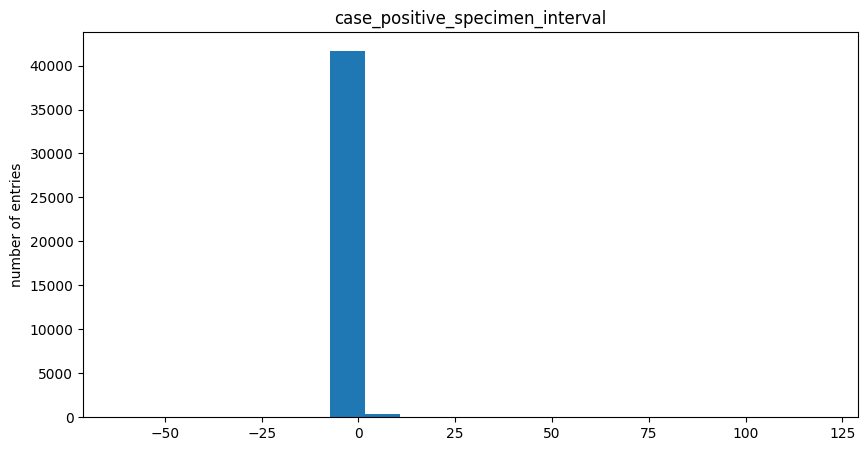

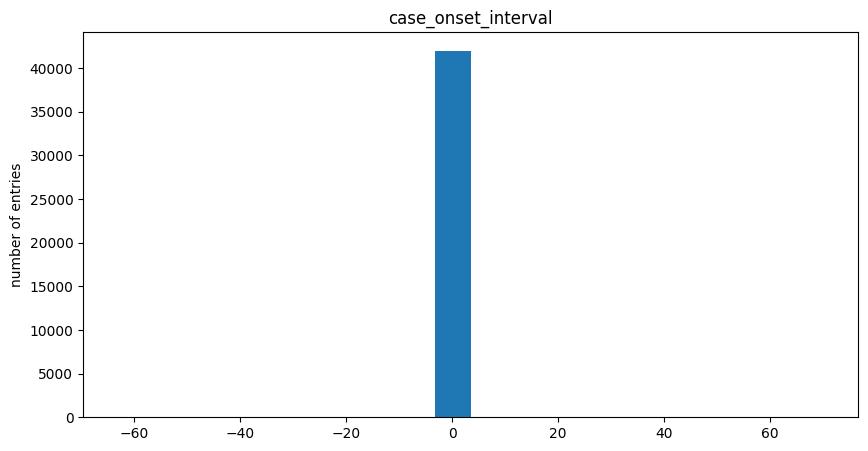

In [94]:
#plotting individual histogram for continuous features
for col in continuous_features:
        f = df[col].plot(kind='hist', figsize=(10,5), bins=20)
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()

##Plotting box plots for continuous features

case_positive_specimen_interval       Axes(0.125,0.77;0.168478x0.11)
case_onset_interval                Axes(0.327174,0.77;0.168478x0.11)
dtype: object

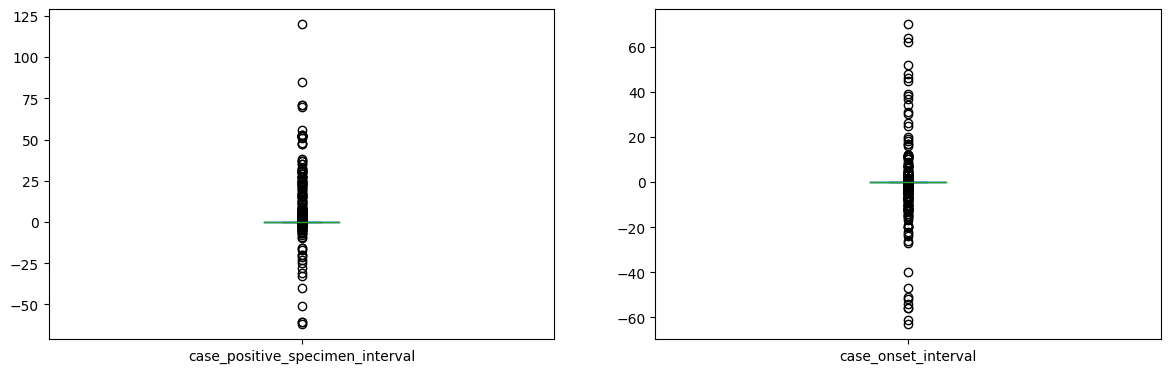

In [93]:
df[continuous_features].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)

##Plotting bar plots for categorical features

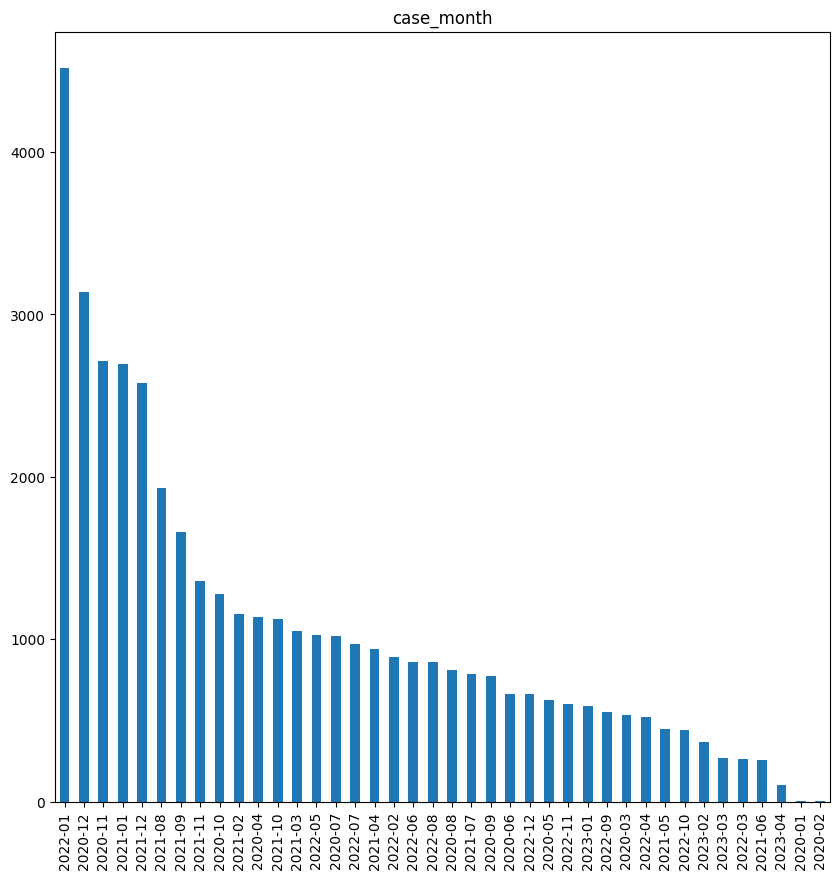

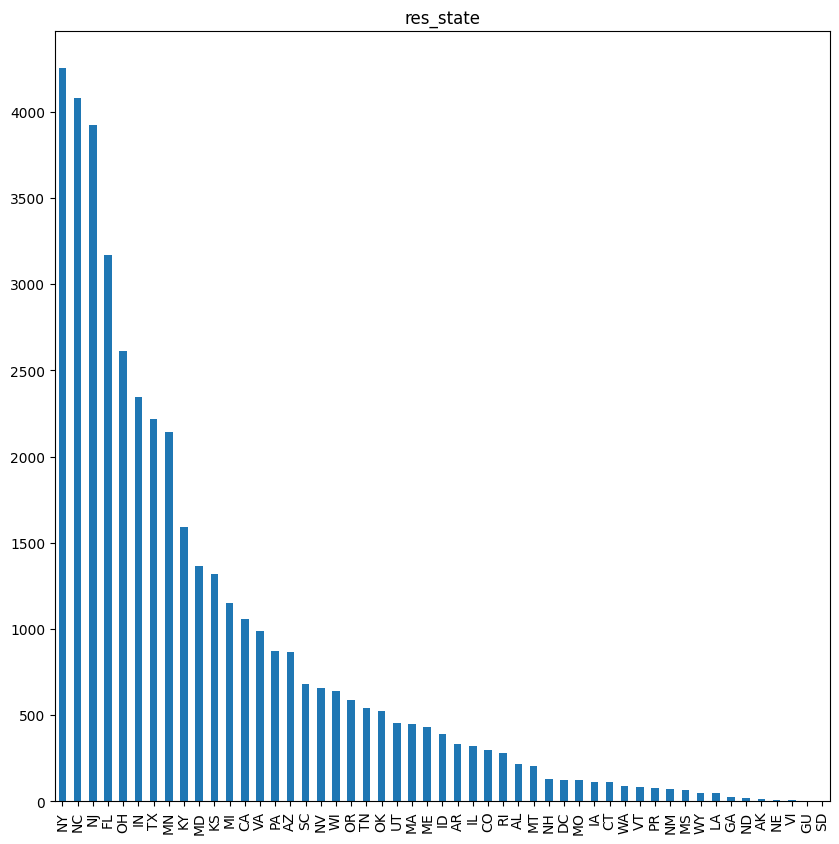

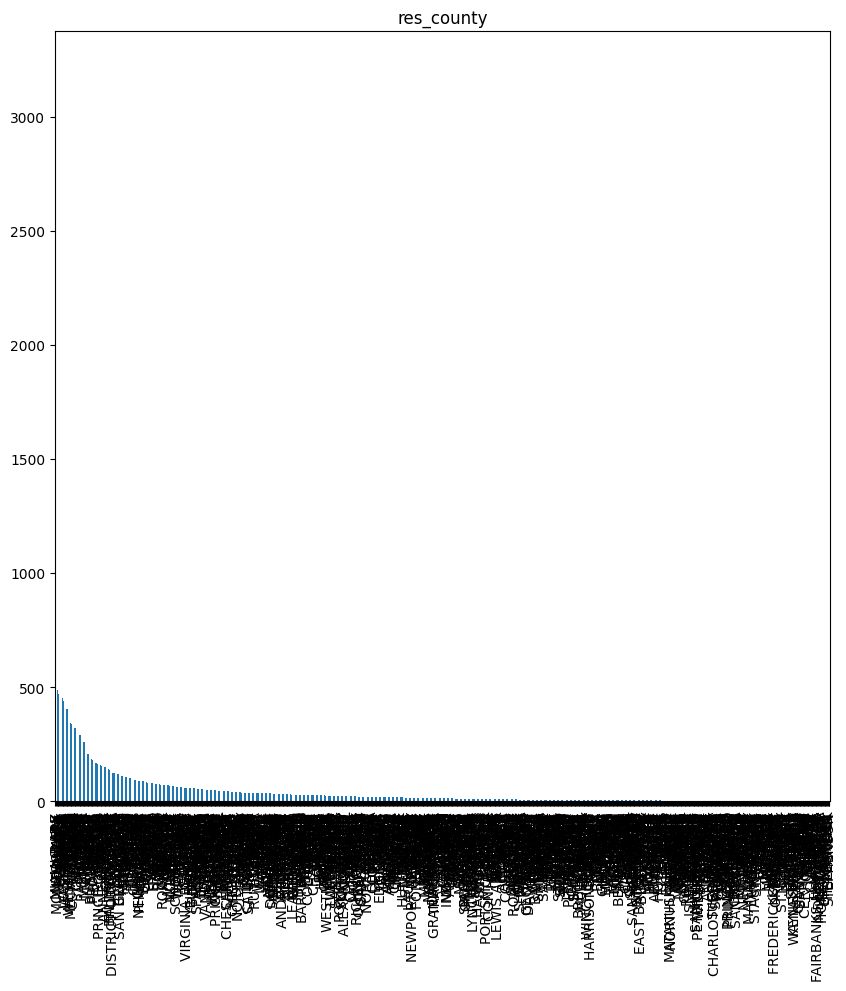

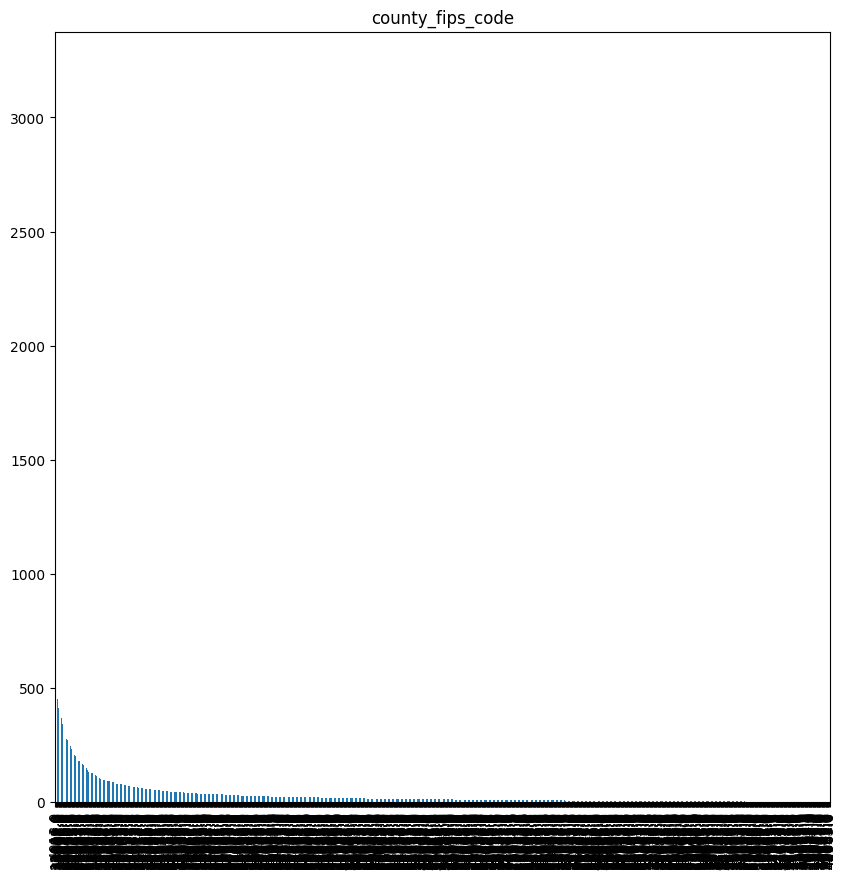

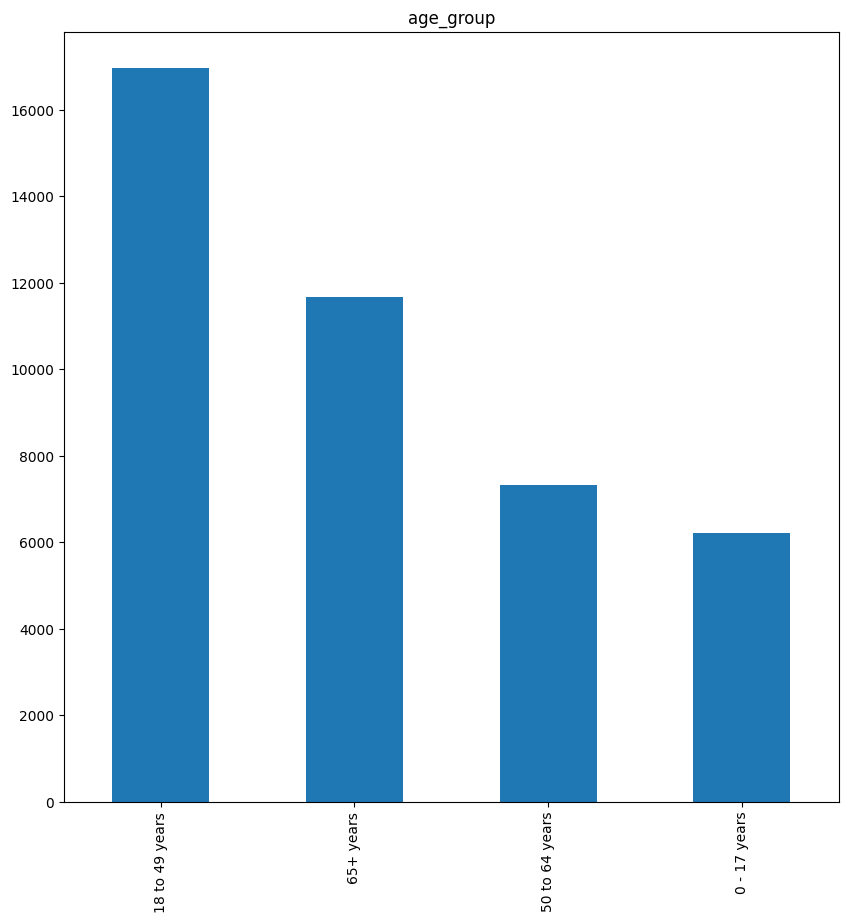

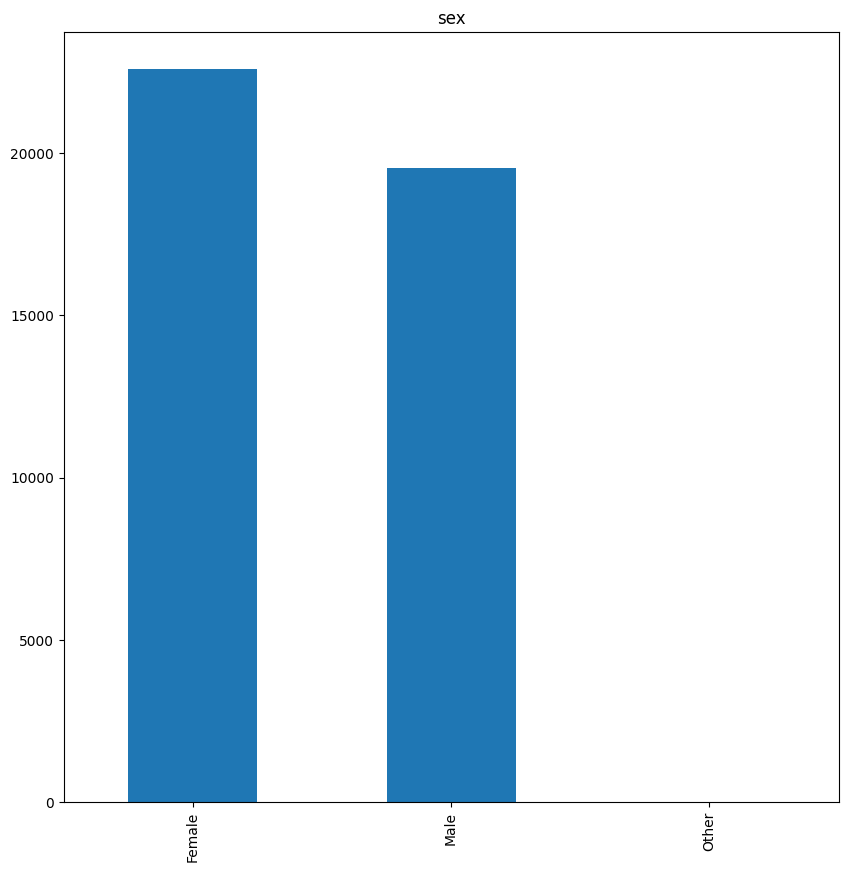

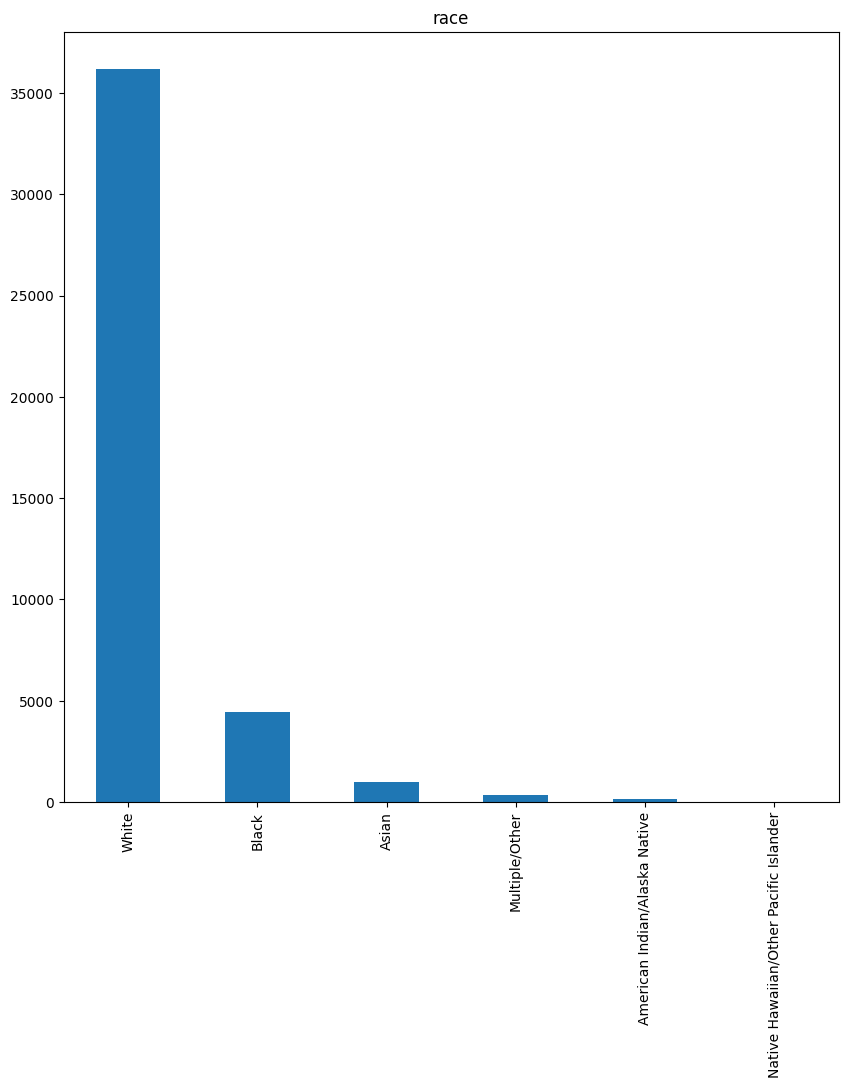

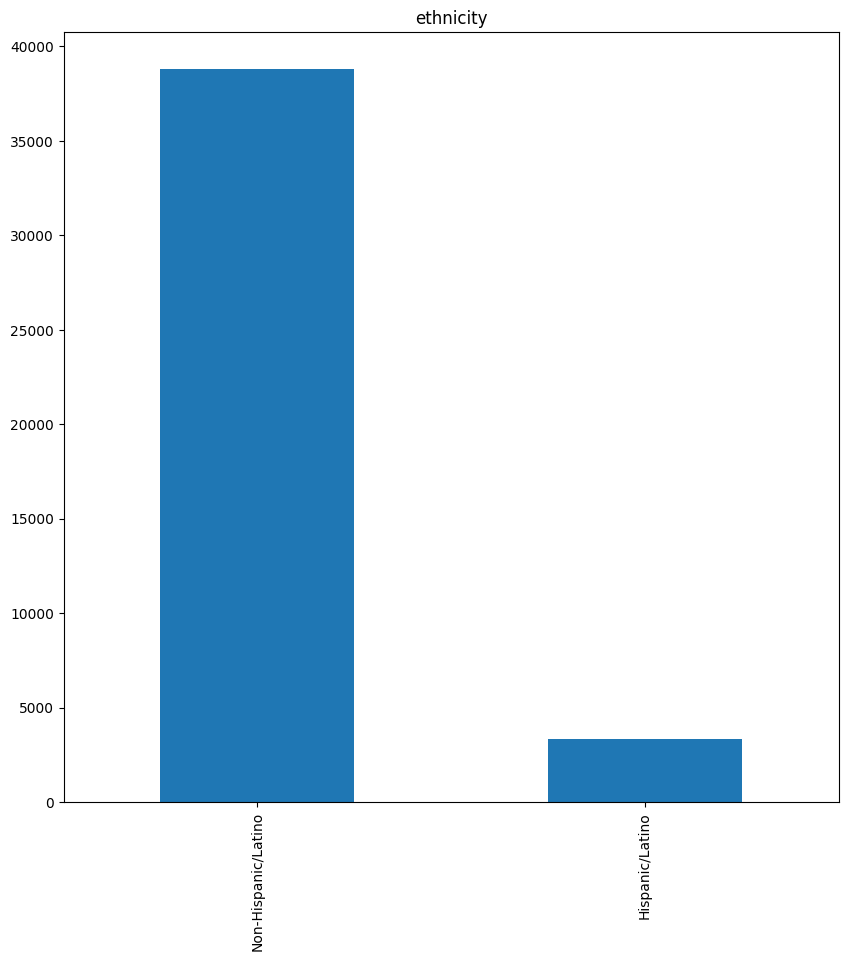

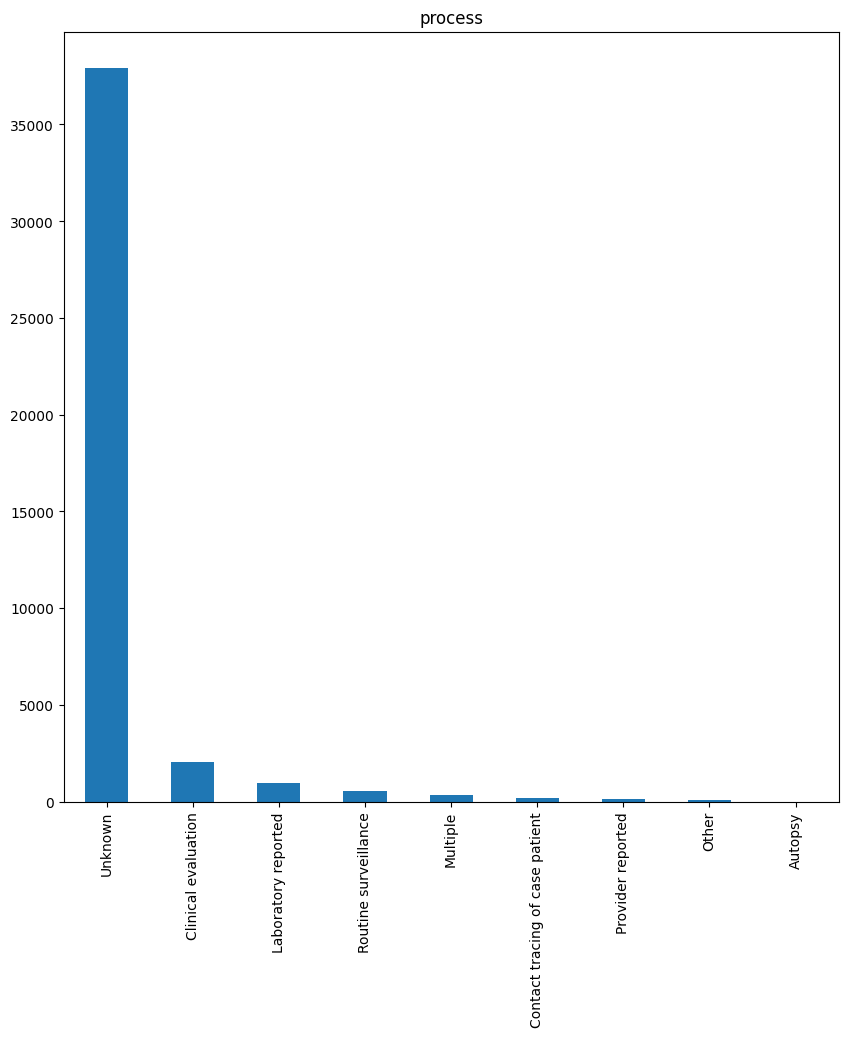

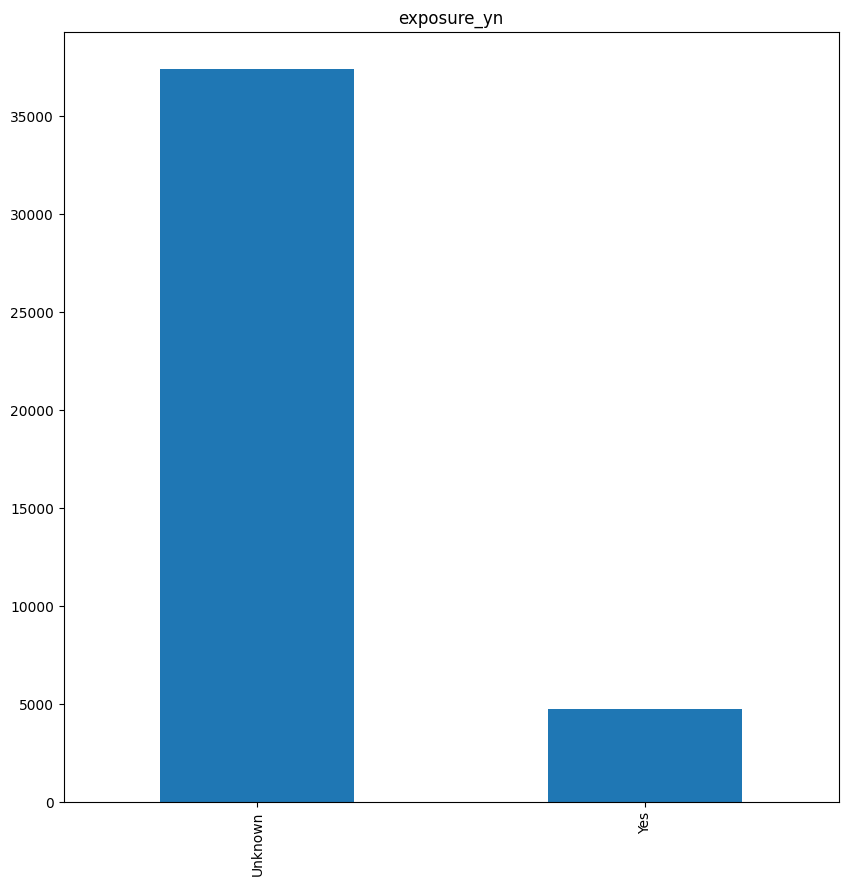

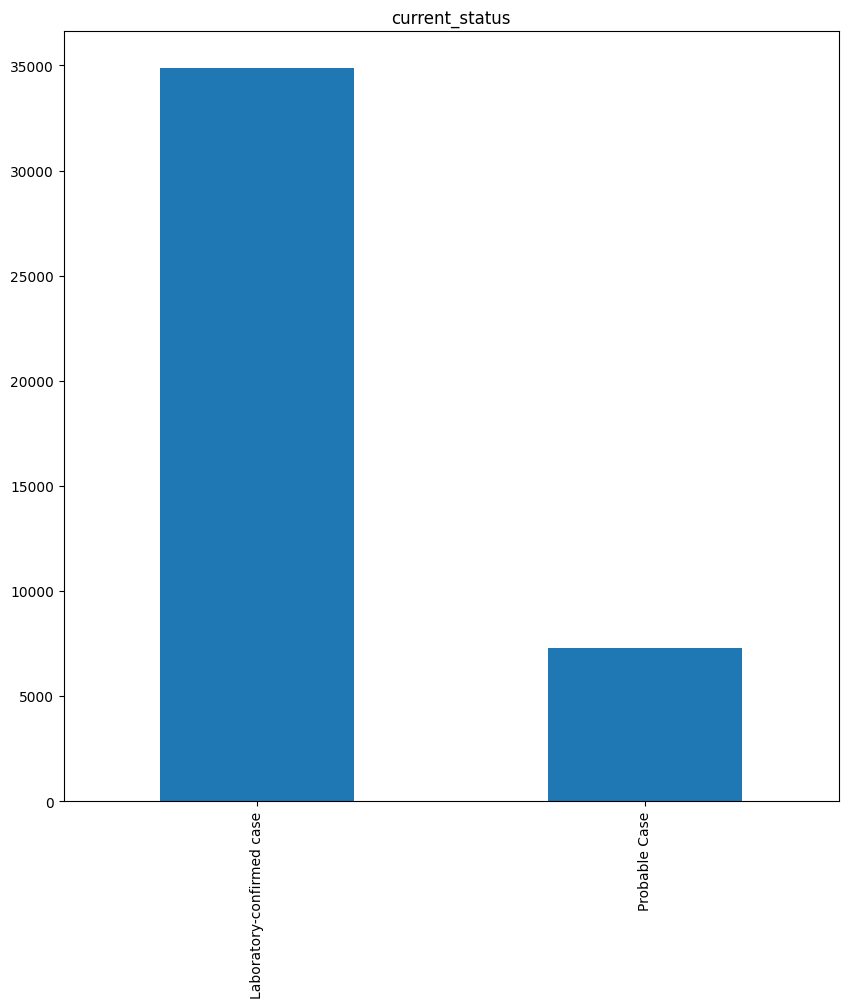

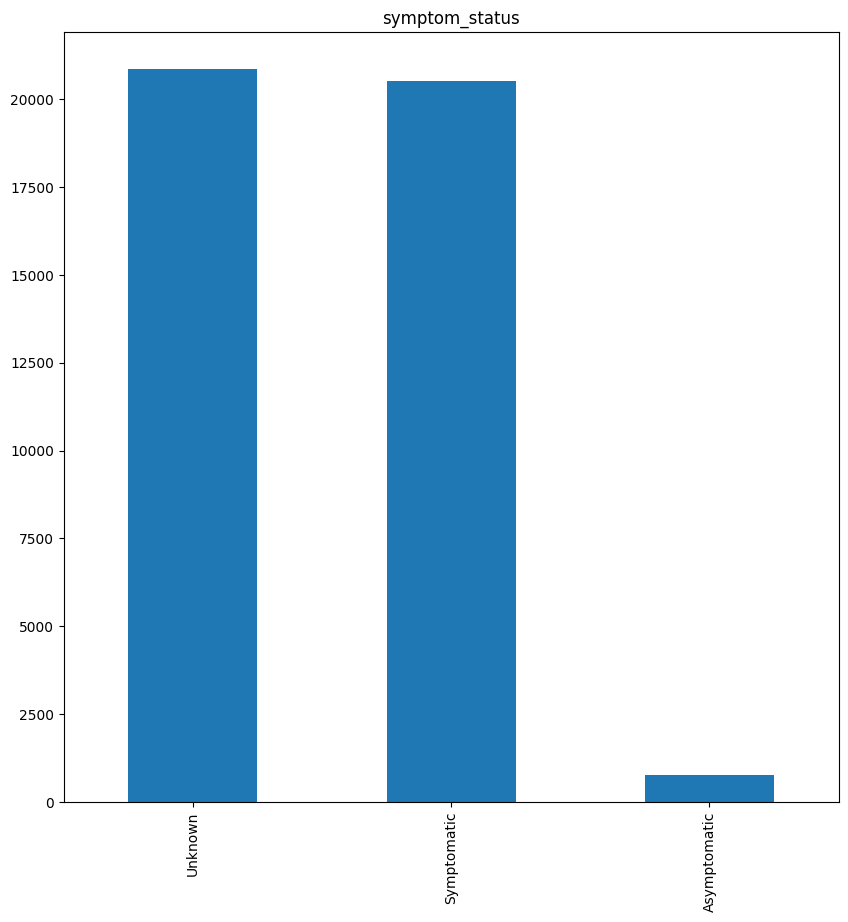

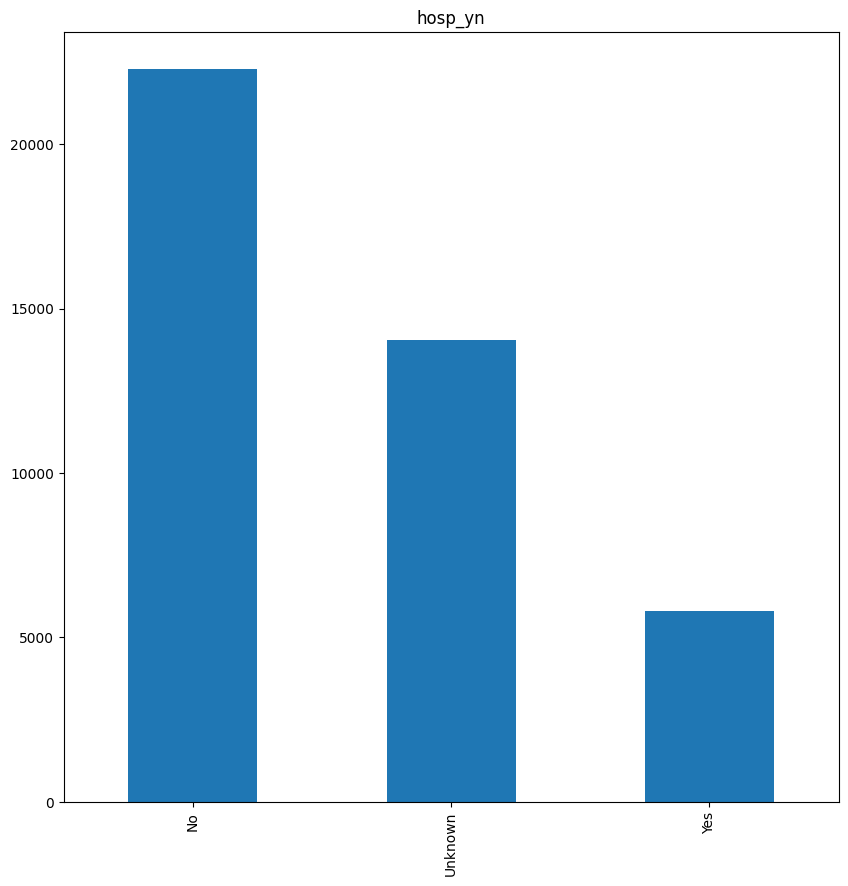

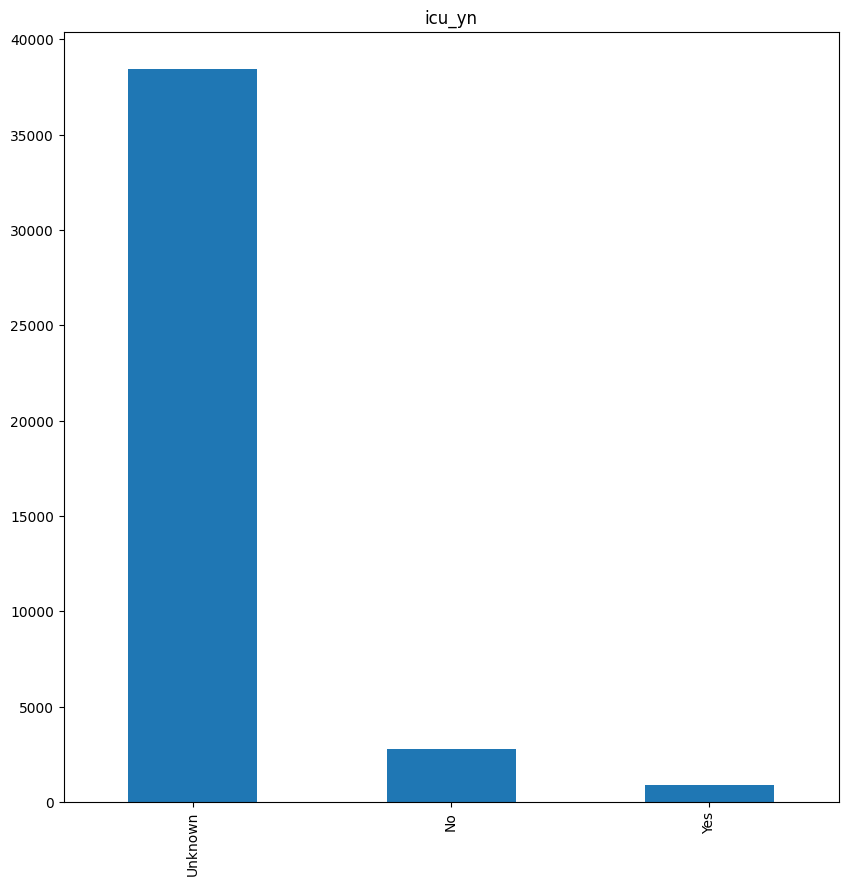

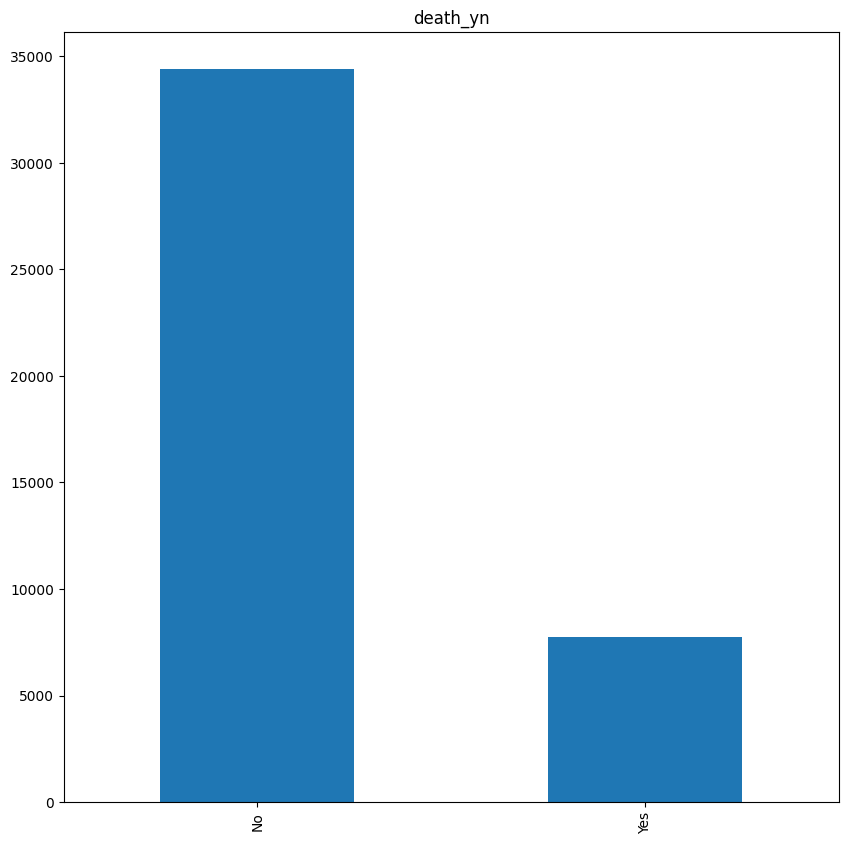

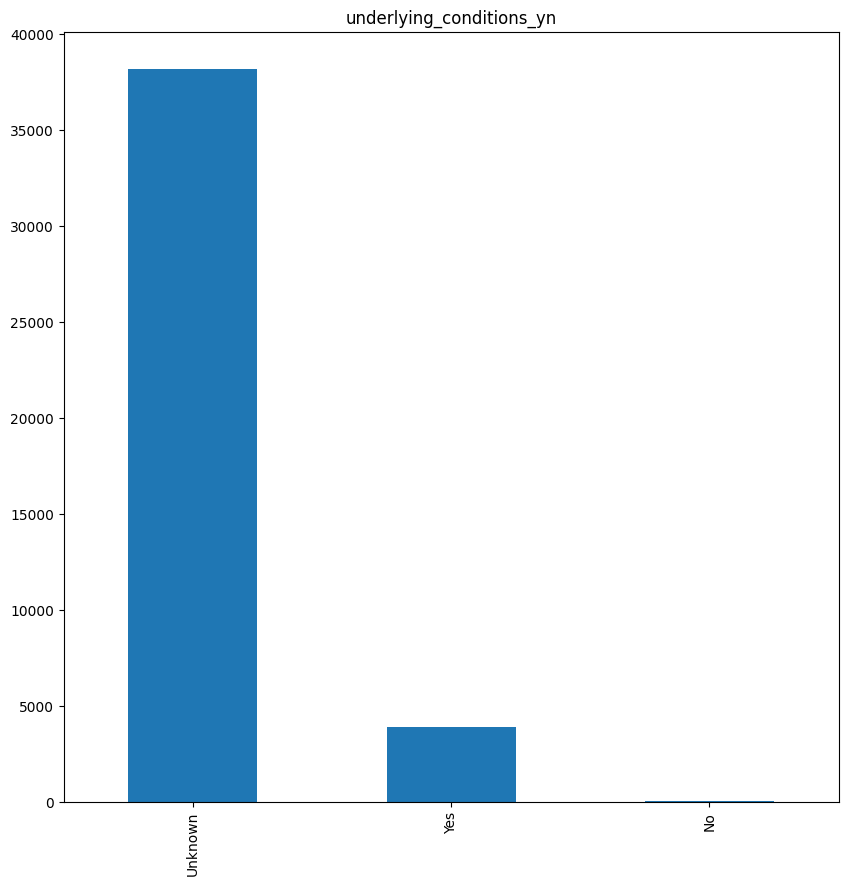

In [92]:
#plotting individual categorical features on bar graph
for col in categorical_columns:
    f = df[col].value_counts().plot(kind='bar', figsize=(10,10))
    plt.title(col)
    plt.show()

#2. Prepare data quality plan for cleaned CSV file

In [ ]:
df.isnull().sum()

In [ ]:
for col in continuous_features:
  print(df[col].unique())

For columns case_positive_specimen_interval, case_onset_interval we have a lot of missing values, therefore I propose we should impute them with the median as this settles the problem of disturbing the distribution of data.

As for the categorical columns, it makes sense to impute them with the mode since categorical data cannot be used to calculate mean or median and for all the missing/unknown data in columns like exposure_yn, process, symptom_status

Another proposed solution for dealing with missing data is removal of rows but that may pose a problem if it leads to removal of a large chunk of data from dataset

As for the values of 'Missing' in data columns like age_group, sex, ethnicity they can be replaced by mode and columns like process, exposure_yn, hosp_yn, icu_yn, symptom_status 'Missing' can be replaced by 'Unknown' as filling with mode/ some other value makes no sense.

##Application of proposed solutions to dataset

In [83]:
df['underlying_conditions_yn'] = df['underlying_conditions_yn'].cat.add_categories(['Unknown'])
df['underlying_conditions_yn'].fillna('Unknown', inplace=True)
df['res_state']=df[['res_state']].replace({'Unknown':df['res_state'].mode()[0], 'Missing':df['res_state'].mode()[0]})
df['res_county']=df[['res_county']].replace({'Unknown':df['res_county'].mode()[0], 'Missing':df['res_county'].mode()[0]})
df['county_fips_code'] = df[['county_fips_code']].replace({'Unknown':df['county_fips_code'].mode()[0], 'Missing':df['county_fips_code'].mode()[0]})
df['age_group'] =  df[['age_group']].replace({'Unknown':df['age_group'].mode()[0], 'Missing':df['age_group'].mode()[0]})
df['sex'] =  df[['sex']].replace({'Unknown':df['sex'].mode()[0], 'Missing':df['sex'].mode()[0]})
df['race'] =  df[['race']].replace({'Unknown':df['race'].mode()[0], 'Missing':df['race'].mode()[0]})
df['ethnicity'] =  df[['ethnicity']].replace({'Unknown':df['ethnicity'].mode()[0], 'Missing':df['ethnicity'].mode()[0]})
df['process'] =  df[['process']].replace({'Missing':'Unknown'})
df['exposure_yn'] =  df[['exposure_yn']].replace({'Missing':'Unknown'})
df['symptom_status'] = df[['symptom_status']].replace({'Missing':'Unknown'})
df['hosp_yn']=df[['hosp_yn']].replace({'Missing':'Unknown'})
df['icu_yn']=df[['icu_yn']].replace({'Missing':'Unknown'})
for col in categorical_columns:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [84]:
for feature in continuous_features:
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)

##Saving new csv file

In [85]:
df.to_csv('covid19-cdc-23200757_cleaned-2.csv',index=False)

#3. Exploring relationships between feature pairs

Out of all the columns, we can draw interactions between categorical features such as race and hosp_yn or age-group and death_yn.

<Figure size 800x600 with 0 Axes>

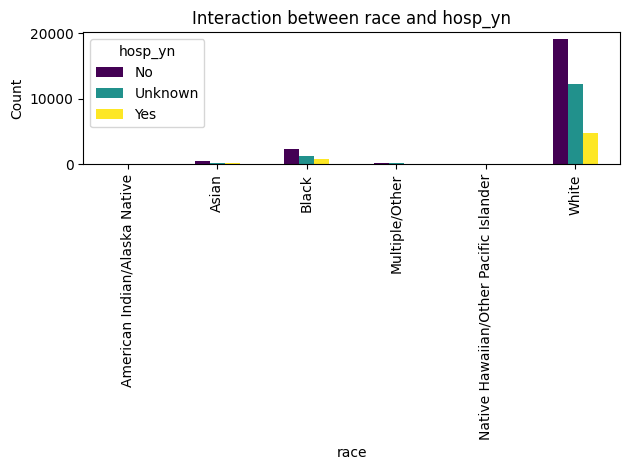

<Figure size 800x600 with 0 Axes>

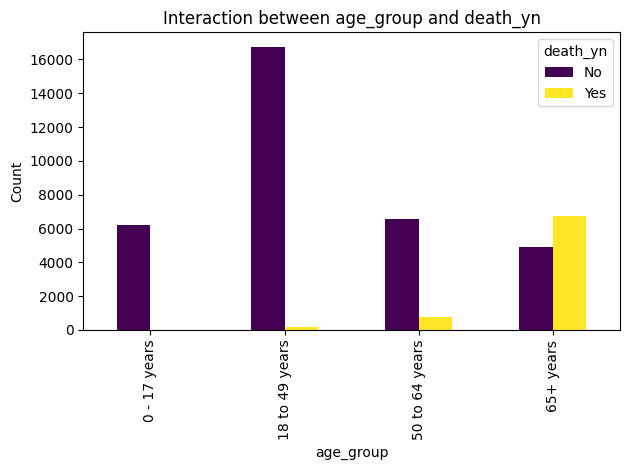

<Figure size 800x600 with 0 Axes>

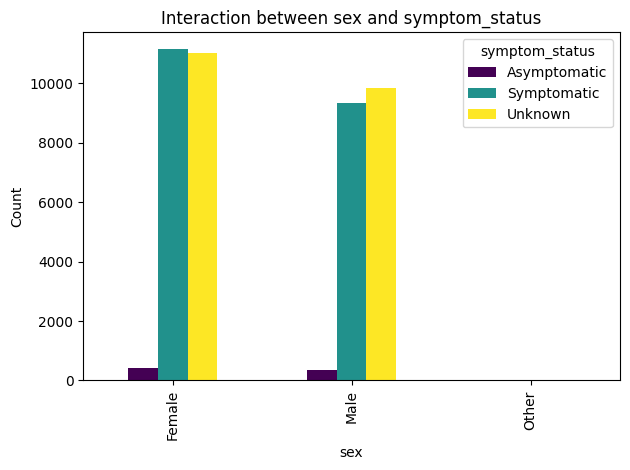

<Figure size 800x600 with 0 Axes>

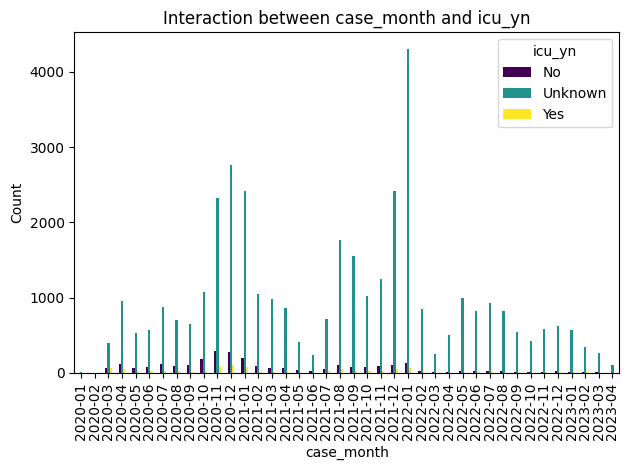

<Figure size 800x600 with 0 Axes>

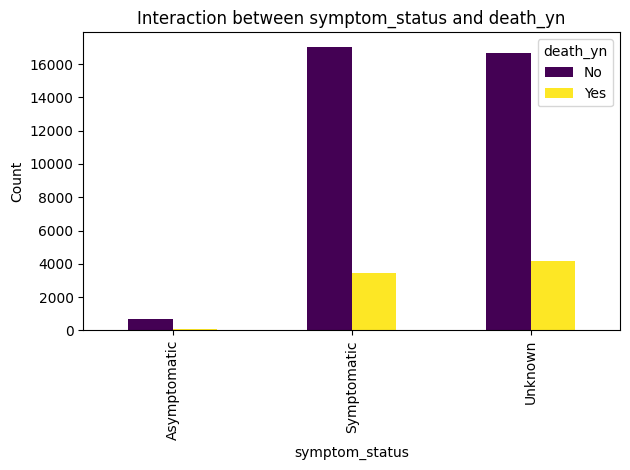

<Figure size 800x600 with 0 Axes>

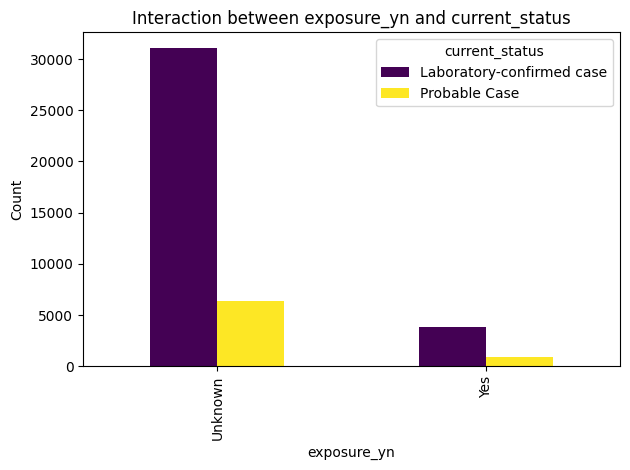

In [90]:
feature_pairs = [('race','hosp_yn'),('age_group','death_yn'),('sex','symptom_status'),('case_month', 'icu_yn'),('symptom_status', 'death_yn'),('exposure_yn', 'current_status')]

# Plotting the feature pairs
for idx, pair in enumerate(feature_pairs):
    plt.figure(figsize=(8, 6))
    counts = df.groupby([pair[0], pair[1]]).size().unstack(fill_value=0)
    counts.plot(kind='bar', colormap='viridis')
    plt.title(f'Interaction between {pair[0]} and {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel('Count')
    plt.legend(title=pair[1])
    plt.tight_layout()
    plt.show()



*   Based on the findings in graph 1, the factor of race really needs to be taken into account when it comes to keeping track of patients which needed hospitalization,specifically being in the "Multiple/Other" category seems to be indicative of a higher likelihood of hospitalization.

*  Based on observations noted in graph 2, we can infer that the age feature is a strong indicator of the target outcome, death_yn. Specifically, the likelihood of passing away increases with age, as the number of individuals in the 'Yes' category is considerably higher for the older age groups.

*  Graph 3 indicates towards more cases being reported as symptomatic for females but point to be noted is that a large number of males with unknown symptom status can change the dynamics of analysis.

*   Looking at graph 4, we can infer that the number of cases have been steadily increasing till january 2022, where there are maximum number of unknown icu statuses.

*   Based on graph 5 observations, it is clear that the symptom status (symptom_status) is a strong indicator of the target outcome, death_yn. Specifically, the likelihood of passing away is significantly higher for symptomatic individuals compared to asymptomatic individuals.

*   Graph 6 indicates that the probability of confirmed and probable cases is significantly higher for individuals who have been exposed to COVID-19 (exposure_yn=Yes) compared to those without exposure (exposure_yn=No).

#4. Create new features

After observing the dataset which was provided, we can create 3 features which will improve understanding of the problem



*  Exposure_duration - This feature could provide insights into the time it takes to develop symptoms after being exposed to COVID-19.
It can be crucial to get the understanding of virus transmission and predicting severity.

*   Risk factor - By combining demographic factors like age and sex, we can capture the combined risk for each patient.By assigning higher score to demographics who have shown higher risk


*   Severity Index - The severity of COVID-19 is heavily influenced by underlying medical conditions as well as symptom severity levels.By creating a composite index that considers both factors, we can better capture the overall health status of each case. This can aid in risk mitigation and treatment planning, particularly in regions which are short on resources.





In [86]:
#adding exposure_duration to dataframe
df['exposure_duration'] = df['case_onset_interval'] - df['case_positive_specimen_interval']

In [87]:
#adding risk factor to dataframe
age_weights = {'0 - 17 years': 1, '18 to 49 years': 2, '50 to 64 years': 3, '65+ years': 4}
sex_weights = {'Male': 'Low', 'Female': 'High', 'Other':'Medium'}
df['risk_factor'] = df['sex'].map(sex_weights).astype(str) +"_"+df['age_group'].map(age_weights).astype(str)

In [88]:
#adding severity index to dataframe
underlying_health_condition_weights = {'Yes': 1, 'No': 0, 'Unknown': 0.5}
symptom_severity_weights = {'Asymptomatic': 'Low', 'Symptomatic': 'High', 'Unknown': 'Medium'}
df['severity_index'] = df['underlying_conditions_yn'].map(underlying_health_condition_weights).astype(str) + df['symptom_status'].map(symptom_severity_weights).astype(str)

In [89]:
#saving the new features to csv
df.to_csv('covid19-cdc-23200757_cleaned-final.csv',index=False)